<a href="https://colab.research.google.com/github/abhiskp/Machine-Learning---A-Case-Study/blob/main/career_prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19CSE305
Machine learning case study



Education and Career Recommender 
System





#Group 3
*CB.EN.U4CSE19102  - ABHIJITH SHAJI


*CB.EN.U4CSE19108 -  DEEPTHI


*CB.EN.U4CSE19117 - HRISHIKESH MENON


*CB.EN.U4CSE19146 - SHRIKARTHIK






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/abhiskp/Machine-Learning---A-Case-Study/main/career_compute_dataset.csv')
df.head()

,SSC Score,HSC score,Cgpa,school_Rank,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,design_skill,self-learning capability?,reading and writing skills,memory capability score,Coding_Skills,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,Type of company want to settle in?,clg_teachers_know,college_performence,Technical_Skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,2,2,2,3,4,1,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,3,3,1,3,4,2,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,2,3,2,2,2,1,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,2,2,2,3,4,2,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,2,3,2,4,4,2,1,2,1,3,1,5,4,3,1,Data Analyst


In [ ]:
df.dtypes


SSC Score                              int64
HSC score                              int64
Cgpa                                   int64
school_Rank                            int64
no_of_miniprojects                     int64
no_of_projects                         int64
coresub_skill                          int64
aptitude_skill                         int64
problemsolving_skill                   int64
programming_skill                      int64
abstractthink_skill                    int64
design_skill                           int64
self-learning capability?              int64
reading and writing skills             int64
memory capability score                int64
Coding_Skills                          int64
technology_used                        int64
sympos_attend                          int64
sympos_won                             int64
extracurricular                        int64
learning_style                        object
Type of company want to settle in?     int64
clg_teache

In [ ]:
df.shape

(7525, 26)

In [ ]:
new = df[['coresub_skill','SSC Score','HSC score','Cgpa','no_of_miniprojects','no_of_projects','memory capability score','aptitude_skill','problemsolving_skill','abstractthink_skill','design_skill','reading and writing skills','Coding_Skills','Technical_Skills']]

In [ ]:
df=df.dropna()


In [ ]:
new.isnull().sum()

coresub_skill                 0
SSC Score                     0
HSC score                     0
Cgpa                          0
no_of_miniprojects            0
no_of_projects                0
memory capability score       0
aptitude_skill                0
problemsolving_skill          0
abstractthink_skill           0
design_skill                  0
reading and writing skills    0
Coding_Skills                 0
Technical_Skills              0
dtype: int64

In [ ]:
new= new.dropna()

In [ ]:
new.shape

(7525, 14)

In [ ]:
new.dtypes

coresub_skill                 int64
SSC Score                     int64
HSC score                     int64
Cgpa                          int64
no_of_miniprojects            int64
no_of_projects                int64
memory capability score       int64
aptitude_skill                int64
problemsolving_skill          int64
abstractthink_skill           int64
design_skill                  int64
reading and writing skills    int64
Coding_Skills                 int64
Technical_Skills              int64
dtype: object

In [ ]:
new.isnull().sum()



coresub_skill                 0
SSC Score                     0
HSC score                     0
Cgpa                          0
no_of_miniprojects            0
no_of_projects                0
memory capability score       0
aptitude_skill                0
problemsolving_skill          0
abstractthink_skill           0
design_skill                  0
reading and writing skills    0
Coding_Skills                 0
Technical_Skills              0
dtype: int64

Feature Engineering 

Consolidating the skills and other activities to get the desired field of expertise

In [ ]:
X = new[['coresub_skill','aptitude_skill','problemsolving_skill','abstractthink_skill','design_skill','reading and writing skills','Coding_Skills','Technical_Skills']]
Y = new[['SSC Score','HSC score','Cgpa','no_of_miniprojects','no_of_projects','memory capability score']]
X.head()

,coresub_skill,aptitude_skill,problemsolving_skill,abstractthink_skill,design_skill,reading and writing skills,Coding_Skills,Technical_Skills
0,1,1,2,2,2,3,1,5
1,1,3,2,3,3,3,2,4
2,1,2,3,2,3,2,1,4
3,1,1,3,2,2,3,2,3
4,1,4,3,2,3,4,2,1


In [ ]:
Y.head()

,SSC Score,HSC score,Cgpa,no_of_miniprojects,no_of_projects,memory capability score
0,2,3,2,1,1,4
1,3,1,2,2,1,4
2,3,4,2,1,1,2
3,3,4,2,1,1,4
4,2,3,2,1,1,4


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [ ]:
X_test.shape

(2509, 8)

In [ ]:
X_train.shape
y_test.shape

(2509, 6)

In [ ]:
X.isnull().sum()

coresub_skill                 0
aptitude_skill                0
problemsolving_skill          0
abstractthink_skill           0
design_skill                  0
reading and writing skills    0
Coding_Skills                 0
Technical_Skills              0
dtype: int64

In [ ]:
Y.isnull().sum()

SSC Score                  0
HSC score                  0
Cgpa                       0
no_of_miniprojects         0
no_of_projects             0
memory capability score    0
dtype: int64

In [ ]:
y_train.shape

(5016, 6)

In [ ]:
X=X.dropna()

In [ ]:
Y=Y.dropna()

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.5916923976895312


In [ ]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error 0.6171038700266747


In [ ]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 0.7855595903727958


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
clf = RandomForestRegressor(n_estimators = 30, random_state = 10)

clf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=3000, random_state=10)

In [ ]:
y_pred_rf = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_rf))

Mean Absolute Error: 0.6359884042073709


In [ ]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred_rf))

Mean Squared Error 0.7416635965121885


In [ ]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

RMSE: 0.8611989296975401


DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt=dt.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred_dt))

Mean Absolute Error: 0.694882226391733


In [ ]:
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred_dt))

Mean Squared Error 1.0305379206717076


In [ ]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))

RMSE: 1.015154136410677


#*Prediction*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif
from sklearn import svm


In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/abhiskp/Machine-Learning---A-Case-Study/main/career_compute_dataset.csv")
dataset.head()

,SSC Score,HSC score,Cgpa,school_Rank,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,design_skill,self-learning capability?,reading and writing skills,memory capability score,Coding_Skills,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,Type of company want to settle in?,clg_teachers_know,college_performence,Technical_Skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,2,2,2,3,4,1,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,3,3,1,3,4,2,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,2,3,2,2,2,1,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,2,2,2,3,4,2,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,2,3,2,4,4,2,1,2,1,3,1,5,4,3,1,Data Analyst


In [ ]:

np.shape(dataset)

(7525, 26)

In [ ]:
data = dataset.iloc[:49,:-1].values
label = dataset.iloc[:49,-1]
#-------------------------------Label Encoding--------------------------#
labelencoder = LabelEncoder()
df = dataset
label = df.iloc[:49,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["ROLE"])
numeric=y["ROLE"].unique() 
y1 = pd.DataFrame({'ROLE':original, 'Associated Number':numeric})
print(y1)

labelencoder = LabelEncoder()
label = labelencoder.fit_transform(label)
y=pd.DataFrame(label,columns=["role"])
X = pd.DataFrame(data,columns=['sslc','hsc','cgpa','school_type','no_of_miniprojects','no_of_projects',
                                'coresub_skill','aptitude_skill','problemsolving_skill','programming_skill','abstractthink_skill',
                                'design_skill','first_computer','first_program','lab_programs','ds_coding','technology_used',
                                'sympos_attend','sympos_won','extracurricular','learning_style','college_bench','clg_teachers_know','college_performence','college_skills'])

                 ROLE  Associated Number
0   Technical Support                  4
1  Software Developer                  2
2      UI/UX Designer                  6
3        Data Analyst                  1
4    Technical Writer                  5
5       Web Developer                  7
6     Software Tester                  3
7    Business Analyst                  0


**FEATURE SELECTION**

 For Feature Selection :

1.   Chi-Squared Statistic 
2.   Mutual Information Statstic


    

In [ ]:
from sklearn.model_selection import train_test_split  #to avoid overfitting
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

Feature 0: 2.101772
Feature 1: 0.955491
Feature 2: 1.599306
Feature 3: 1.769333
Feature 4: 3.316358
Feature 5: 1.125758
Feature 6: 1.299609
Feature 7: 6.225678
Feature 8: 1.013542
Feature 9: 1.529464
Feature 10: 6.433067
Feature 11: 3.607745
Feature 12: 0.611667
Feature 13: 1.566959
Feature 14: 0.907095
Feature 15: 4.838542
Feature 16: 1.000189
Feature 17: 2.309167
Feature 18: 2.526337
Feature 19: 3.994762
Feature 20: 3.109337
Feature 21: 0.519778
Feature 22: 0.356387
Feature 23: 0.116054
Feature 24: 5.677100


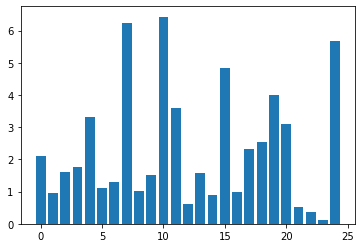

 The number of important features with threshold as 1 :19 
Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


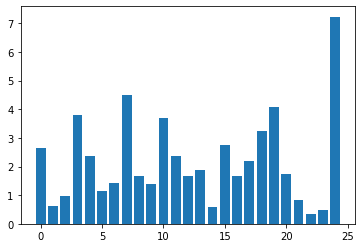

 The number of important features with threshold as 1 :19 
Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


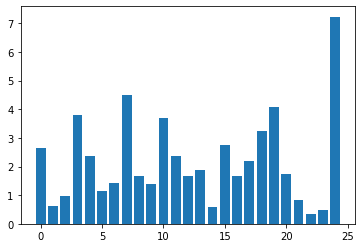

 The number of important features with threshold as 1 : 19


In [ ]:
# feature selection
# example of chi squared feature selection for categorical data
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)


# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
pyplot.show()

count = 0
for i in fs1.scores_ : 
    if i > 1 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 1 :{} ".format(k1))

fs1.scores_.sort()





for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()


count = 0
for i in fs3.scores_ : 
    if i > 1 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 1 :{} ".format(k3))





for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
    if i > 1 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 1 : {}" .format(k5))

So, from above plot we remove the features with lower importance scores (<1.5).

Hence features 2,5,8,9,14,16,21,22,23 are not considered,

We could set k=16 i.e (25-9)  When configuring the SelectKBest to select these top 16 features

In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)

 
#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')



Without feature Selection : 
Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 50.0
With feature Selection : 
Model accuracy score with Decision Tree 50.0
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 1.939425
Feature 1: 0.621032
Feature 2: 1.190205
Feature 3: 2.361067
Feature 4: 2.723434
Feature 5: 1.019886
Feature 6: 1.630621
Feature 7: 5.962755
Feature 8: 0.948673
Feature 9: 1.391667
Feature 10: 3.995109
Feature 11: 3.001412
Feature 12: 1.301361
Feature 13: 1.730517
Feature 14: 0.916034
Feature 15: 2.627847
Feature 16: 0.703328
Feature 17: 2.405423
Feature 18: 3.379566
Feature 19: 3.567291
Feature 20: 2.512279
Feature 21: 1.074299
Feature 22: 0.271954
Feature 23: 0.452889
Feature 24: 8.890845


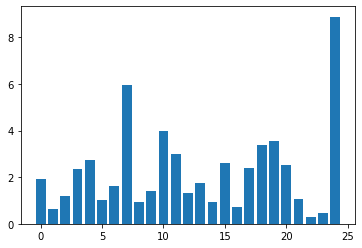

 The number of important features with threshold as 0.2 :25 
Feature 0: 0.207417
Feature 1: 0.006580
Feature 2: 0.223185
Feature 3: 0.000000
Feature 4: 0.803585
Feature 5: 1.246487
Feature 6: 0.921099
Feature 7: 0.239759
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.290617
Feature 11: 0.366229
Feature 12: 0.605941
Feature 13: 0.078829
Feature 14: 1.435146
Feature 15: 0.078621
Feature 16: 1.218024
Feature 17: 0.017366
Feature 18: 0.072852
Feature 19: 0.123105
Feature 20: 0.258225
Feature 21: 0.157860
Feature 22: 0.425284
Feature 23: 0.275533
Feature 24: 0.207432


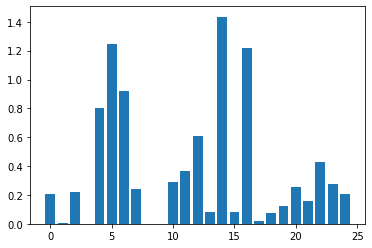

 The number of important features with threshold as 0.2 :15 
Feature 0: 0.061610
Feature 1: 0.000000
Feature 2: 0.258912
Feature 3: 0.007952
Feature 4: 0.864749
Feature 5: 1.411216
Feature 6: 0.662062
Feature 7: 0.200131
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.359816
Feature 11: 0.277679
Feature 12: 0.467492
Feature 13: 0.311589
Feature 14: 1.636927
Feature 15: 0.009578
Feature 16: 1.522832
Feature 17: 0.531538
Feature 18: 0.264838
Feature 19: 0.081172
Feature 20: 0.165119
Feature 21: 0.362209
Feature 22: 0.492693
Feature 23: 0.456423
Feature 24: 0.066031


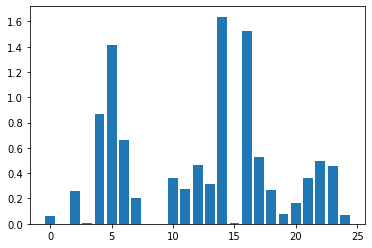

 The number of important features with threshold as 0.2 : 16


In [ ]:
# feature selection
# example of chi squared feature selection for categorical data
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

count = 0
for i in fs.scores_ : 
    if i > 0.2 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 0.2 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ : 
    if i > 0.2 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 0.2 :{} ".format(k3))

#X_train4, X_test4, fs = select_features(X_train2, y_train2, X_test2)
for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
    if i > 0.2 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 0.2 : {}" .format(k5))

In [ ]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)

 
#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Without feature Selection : 
Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 50.0
With feature Selection : 
Model accuracy score with Decision Tree 30.0
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*SVM* *&*  *DECISION TREE*

In [ ]:
#Support Vector machine
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from pandas import read_csv
from sklearn.model_selection import train_test_split
def svm(X_train,y_train,X_test,y_test):
  
  # import metrics to compute accuracy
  from sklearn.metrics import accuracy_score
  svc=SVC() 
  # fit classifier to training set
  svc.fit(X_train,y_train)
  # make predictions on test set
  y_pred=svc.predict(X_test)
  # compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
  return accuracy_score(y_test, y_pred)*100


def Dec_tree(X_train,y_train,X_test,y_test):
  from sklearn import tree
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  # Prediction
  y_pred = clf.predict(X_test)
  y_test_arr=y_test['role']
  from sklearn.metrics import confusion_matrix,accuracy_score
  accuracy = accuracy_score(y_test,y_pred)
  print('Model accuracy score with Decision Tree', accuracy_score(y_test, y_pred)*100)
  return accuracy*100,clf



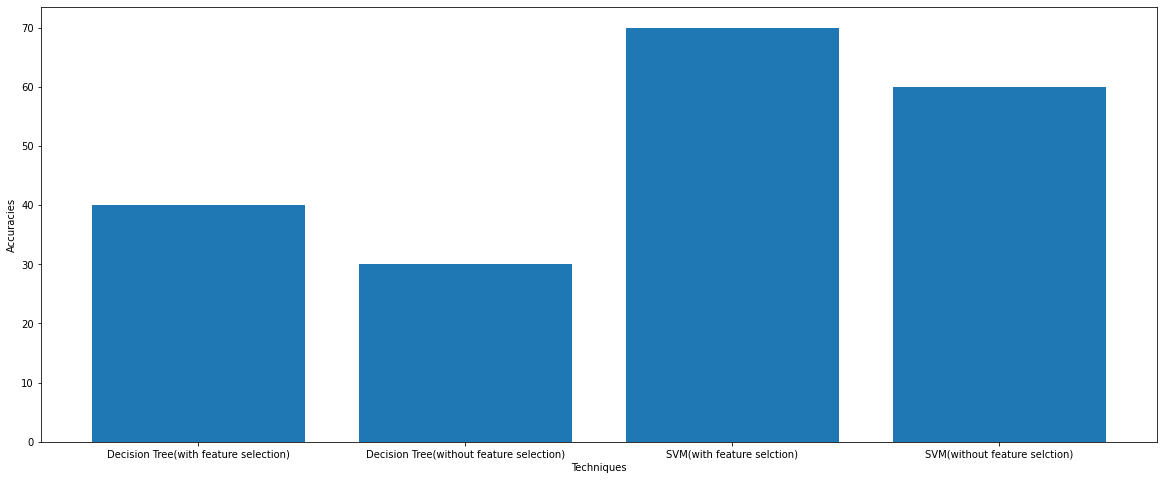

In [ ]:
import matplotlib.pyplot as plt
#fig = plt.figure()
fig = plt.figure(figsize =(20, 8)) 
#ax = fig.add_axes([0,0,1,1])
Name = ['Decision Tree(with feature selection)','Decision Tree(without feature selection)', 'SVM(with feature selction)','SVM(without feature selction)']
accuracies = [40,30,70,60]
plt.bar(Name,accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Techniques')
plt.show()

In [ ]:

# x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
x_new = []
feat = list(X.columns) 
for i in feat:
  print(i)
  val = input("Enter: ") 
  x_new.append(val)
x_new

sslc
Enter: 3
hsc
Enter: 5
cgpa
Enter: 4
school_type
Enter: 3
no_of_miniprojects
Enter: 5
no_of_projects
Enter: 4
coresub_skill
Enter: 3
aptitude_skill
Enter: 5
problemsolving_skill
Enter: 2
programming_skill
Enter: 2
abstractthink_skill
Enter: 5
design_skill
Enter: 2
first_computer
Enter: 5
first_program
Enter: 4
lab_programs
Enter: 2
ds_coding
Enter: 5
technology_used
Enter: 5
sympos_attend
Enter: 3
sympos_won
Enter: 2
extracurricular
Enter: 5
learning_style
Enter: 5
college_bench
Enter: 4
clg_teachers_know
Enter: 2
college_performence
Enter: 3
college_skills
Enter: 4


['3',
 '5',
 '4',
 '3',
 '5',
 '4',
 '3',
 '5',
 '2',
 '2',
 '5',
 '2',
 '5',
 '4',
 '2',
 '5',
 '5',
 '3',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '4']

In [ ]:
#x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
 
new_pred  = clf.predict([x_new])
print("Prediction : {}".format(y1[y1['Associated Number']==new_pred[0]]['ROLE']))

Prediction : 4    Technical Writer
Name: ROLE, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"




#**Comparison**

SVM

In [ ]:
svm(X_train,y_train,X_test,y_test)

Model accuracy score with default hyperparameters: 40.0000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40.0

DECISION TREE

In [ ]:
 Dec_tree(X_train,y_train,X_test,y_test)

Model accuracy score with Decision Tree 30.0


(30.0, DecisionTreeClassifier())

#***VISUALIZATION***

In [ ]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.axes as ax

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/abhiskp/Machine-Learning---A-Case-Study/main/career_compute_dataset.csv')
df

,SSC Score,HSC score,Cgpa,school_Rank,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,design_skill,self-learning capability?,reading and writing skills,memory capability score,Coding_Skills,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,Type of company want to settle in?,clg_teachers_know,college_performence,Technical_Skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,2,2,2,3,4,1,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,3,3,1,3,4,2,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,2,3,2,2,2,1,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,2,2,2,3,4,2,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,2,3,2,4,4,2,1,2,1,3,1,5,4,3,1,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,3,4,2,4,4,4,1,4,2,2,1,4,4,3,3,NaN
7521,2,3,3,3,4,3,2,1,3,3,3,3,2,4,4,3,4,2,3,2,4,1,3,3,2,NaN
7522,3,2,1,2,1,1,1,2,2,3,1,2,1,3,3,2,1,3,1,1,3,5,3,3,4,NaN
7523,2,1,1,1,2,1,1,2,2,2,2,3,1,3,4,2,1,3,2,1,2,4,4,3,4,NaN


In [ ]:
df["ROLE"].unique()

array(['Technical Support', 'Software Developer', 'UI/UX Designer',
       'Data Analyst', 'Technical Writer', 'Web Developer',
       'Software Tester', 'Business Analyst', 'Quility Assurance officer',
       'Marketing Manger', 'Database Developer', nan], dtype=object)

In [ ]:
df["Type of company want to settle in?"].unique()

array([4, 5, 3, 1, 2])

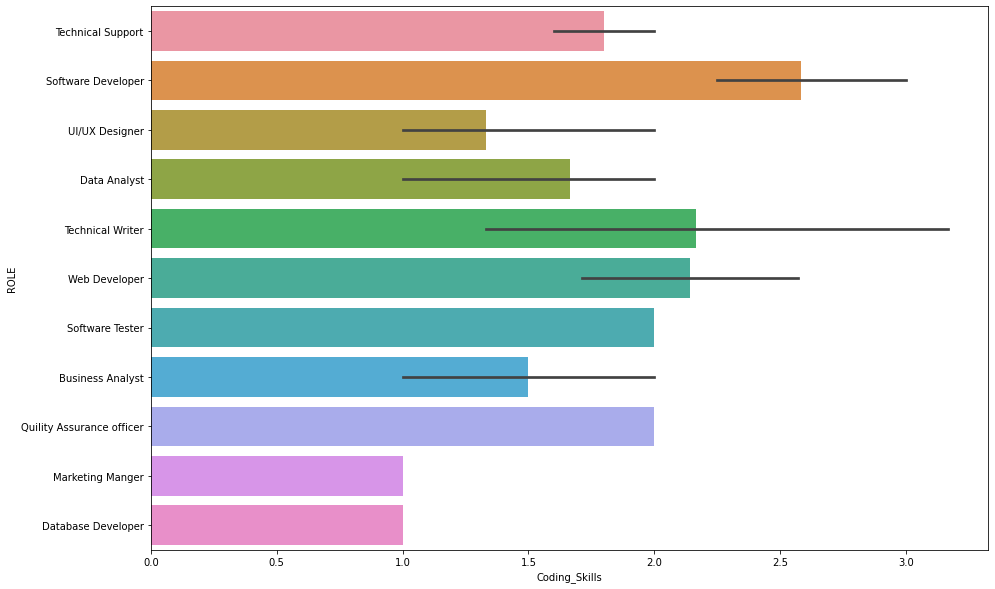

In [ ]:
plt.subplots(figsize=(15,10))
sns.barplot(x="Coding_Skills", y="ROLE", data=df)  

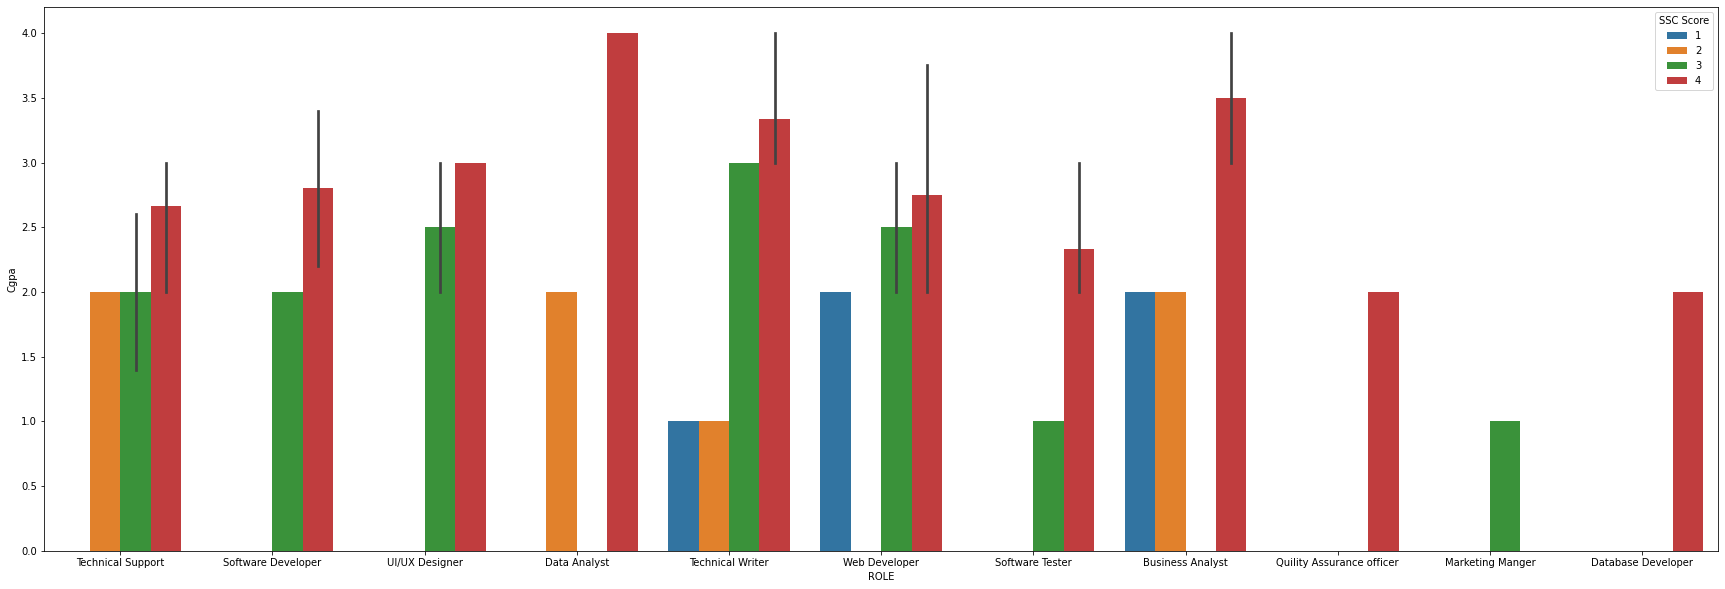

In [ ]:
plt.subplots(figsize=(30,10))
sns.barplot(x="ROLE", y="Cgpa", hue="SSC Score", data=df)  


No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


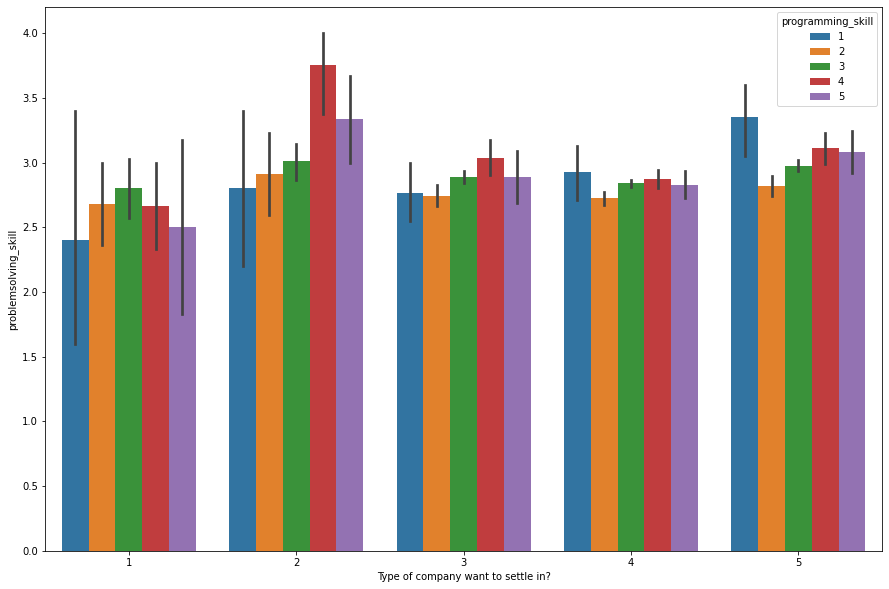

In [ ]:
plt.subplots(figsize=(15,10))
plt.legend(ncol=2)
sns.barplot(df['Type of company want to settle in?'],df['problemsolving_skill'],hue=df['programming_skill'])

In [ ]:
x=df["Type of company want to settle in?"]
y=df["Cgpa"]

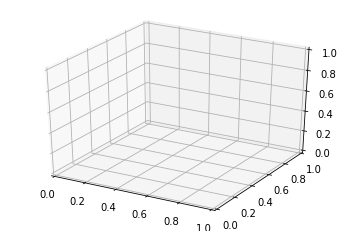

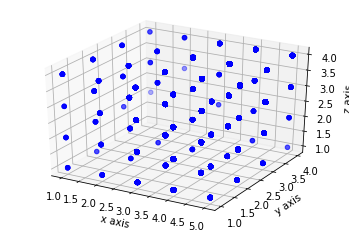

In [ ]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
plt.axes(projection='3d')
type(ax)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x=df["Type of company want to settle in?"]
y=df["Cgpa"]
z=df["SSC Score"]

ax.scatter(x,y,z,marker = 'o',c = 'b')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()

In [ ]:
df.head(1)

,SSC Score,HSC score,Cgpa,school_Rank,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,abstractthink_skill,design_skill,self-learning capability?,reading and writing skills,memory capability score,Coding_Skills,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,Type of company want to settle in?,clg_teachers_know,college_performence,Technical_Skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,2,2,2,3,4,1,1,3,1,2,2,4,3,4,5,Technical Support


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 800x1200 with 0 Axes>

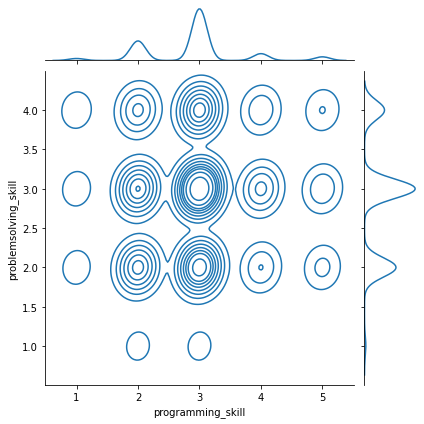

In [ ]:
plt.figure(figsize=(10, 15), dpi=80)

sns.jointplot(df['programming_skill'],df['problemsolving_skill'],kind="kde")